<a href="https://colab.research.google.com/github/ellenwterry/Modeling/blob/master/Simple_Linear_Eq_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
!pip install pystan
!pip install corner
import stan

!pip install nest-asyncio
import nest_asyncio
nest_asyncio.apply()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.8 MB/s eta 0:00:00


Generate Data

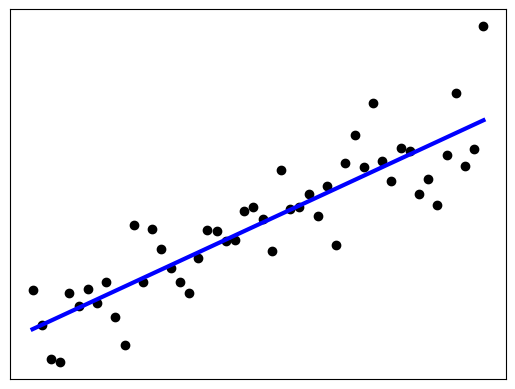

In [ ]:
n = 50
x = []
for i in range(1, n+1):
    x.append(i)

mu = 0;
sigma = 15;
noise = np.random.normal(mu, sigma, n)
dAlpha = 10
dBeta = 2

yObs = dAlpha + np.multiply(x, 2) + noise
yPred = dAlpha + np.multiply(x, 2)

kData = pd.DataFrame({'x': x, 'yObs': yObs, 'yPred' : yPred})
kData

# Plot outputs
plt.scatter(kData['x'], kData['yObs'], color="black")
plt.plot(kData['x'], kData['yPred'], color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
stanMod2 = """
data {
int<lower=0> N;
  vector[N] y;
  vector[N] x;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  target += normal_lpdf(y | (alpha + beta*x), sigma);
}
"""

In [ ]:
mData = {"y": yObs,
         "N": n,
         "x": x}

In [ ]:
yObs

array([ 30.18197257,  13.95356685,  -2.05888864,  -3.48220655,
        28.79417435,  23.05025364,  30.97378159,  24.24516738,
        34.00513484,  17.60193756,   4.61666202,  60.71784317,
        33.96361274,  58.91553231,  49.46430234,  40.68909008,
        34.05795962,  28.82704353,  45.31400885,  58.4257025 ,
        58.15079421,  53.55002801,  54.02223716,  67.51799501,
        69.22386176,  63.49391165,  48.80733906,  86.65629695,
        68.32182358,  69.49784556,  75.61765455,  65.17778933,
        79.30009468,  51.39927459,  89.79680679, 103.30805142,
        87.93178218, 118.1562127 ,  90.81869325,  81.32803853,
        96.83903657,  95.49725739,  75.43490985,  82.63152179,
        70.13680253,  93.58178699, 122.93418045,  88.65690904,
        96.38418962, 154.11380874])

In [ ]:
postr = stan.build(stanMod2, data = mData, random_seed = 1)

Building...



Building: found in cache, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


In [ ]:
fit = postr.sample(num_chains=4, num_samples=1000)

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!


In [ ]:
df = fit.to_frame()

In [ ]:
Params = df.describe().T
alpha = Params['mean']['alpha']
beta = Params['mean']['beta']
alpha, beta

(0.9536992943024089, 2.2491479648920154)